In [ ]:
# import csv
# import random

# def read_txt_file(file_path):
#     with open(file_path, 'r', encoding='utf-8') as file:
#         data = [line.strip() for line in file.readlines()]
#     return data

# def read_csv_file(file_path):
#     with open(file_path, 'r', encoding='utf-8') as file:
#         reader = csv.reader(file)
#         data = [row[0] for row in reader]
#     return data

# def random_sample_data(data, num_samples):
#     return random.sample(data, min(num_samples, len(data)))

# def label_data(data, label):
#     return [(label, item) for item in data]

# def write_data_with_labels(data, output_file):
#     with open(output_file, 'w', newline='', encoding='utf-8') as file:
#         writer = csv.writer(file)
#         for label, row in data:
#             writer.writerow([label] + [row])

# def main():
#     # 文件路径
#     file_path_restaurant = 'BeRPtranscript.txt'
#     file_path_smalltalk = 'smallTalk.csv'
#     file_path_user_account = 'accountManager.csv'
#     output_file = 'labeled_data.csv'

#     # 读取数据
#     restaurant_data = read_txt_file(file_path_restaurant)
#     smalltalk_data = read_csv_file(file_path_smalltalk)
#     user_account_data = read_csv_file(file_path_user_account)

#     # 随机选择一定数量的数据
#     num_samples = 540
#     restaurant_sample = random_sample_data(restaurant_data, num_samples)
#     smalltalk_sample = random_sample_data(smalltalk_data, num_samples)
#     # smalltalk_sample = smalltalk_data
#     user_account_sample = user_account_data  # 选择所有用户数据

#     # 标记数据
#     labeled_restaurant = label_data(restaurant_sample, 0)
#     labeled_smalltalk = label_data(smalltalk_sample, 1)
#     labeled_user_account = label_data(user_account_sample, 2)

#     labeled_data = labeled_restaurant + labeled_smalltalk + labeled_user_account

#     # 保存标记后的数据
#     write_data_with_labels(labeled_data, output_file)
#     print(f"Labeled data saved to {output_file}")

# if __name__ == "__main__":
#     main()


In [2]:
import csv

def read_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = [line.strip() for line in file.readlines()]
    return data

def read_csv_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        data = [row[0] for row in reader]
    return data

def label_data(data, label):
    return [(label, item) for item in data]

def write_data_with_labels(data, output_file):
    with open(output_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        for label, row in data:
            writer.writerow([label] + [row])

def main():
    file_path_restaurant = 're0.txt'
    file_path_user_account = 'accountManager.csv'
    output_file = 'labeled_data.csv'

    restaurant_data = read_txt_file(file_path_restaurant)
    user_account_data = read_csv_file(file_path_user_account)

    labeled_restaurant = label_data(restaurant_data, 0)
    labeled_user_account = label_data(user_account_data, 1)

    labeled_data = labeled_restaurant + labeled_user_account

    write_data_with_labels(labeled_data, output_file)
    print(f"Labeled data saved to {output_file}")

if __name__ == "__main__":
    main()


Labeled data saved to labeled_data.csv


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('labeled_data.csv', header=None, names=['label', 'text'])

# 处理NaN值，可以选择删除或者替换
df = df.dropna()  # 删除包含NaN的行
# 或者
# df['text'].fillna('', inplace=True)  # 替换NaN为特定的值，例如空字符串

# 分割数据集为训练集和测试集
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# 定义停用词集合
stop_words = set(stopwords.words('english'))

# 文本特征提取
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words='english')
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

# 标签
y_train = train_data['label']
y_test = test_data['label']

# 初始化朴素贝叶斯分类器
classifier = MultinomialNB()

# 模型训练
classifier.fit(X_train, y_train)

# 预测
y_pred = classifier.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# 保存训练好的模型
model_filename = 'main_classifier_model.joblib'
vectorizer_filename = 'main_vectorizer.joblib'

joblib.dump(classifier, model_filename)
joblib.dump(vectorizer, vectorizer_filename)

print(f"model save  {model_filename}")
print(f"text vertor {vectorizer_filename}")

Accuracy: 0.9910714285714286
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       119
           1       0.98      1.00      0.99       105

    accuracy                           0.99       224
   macro avg       0.99      0.99      0.99       224
weighted avg       0.99      0.99      0.99       224

model save  main_classifier_model.joblib
text vertor main_vectorizer.joblib


d:\ProgramData\Anaconda3\envs\humanai01\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


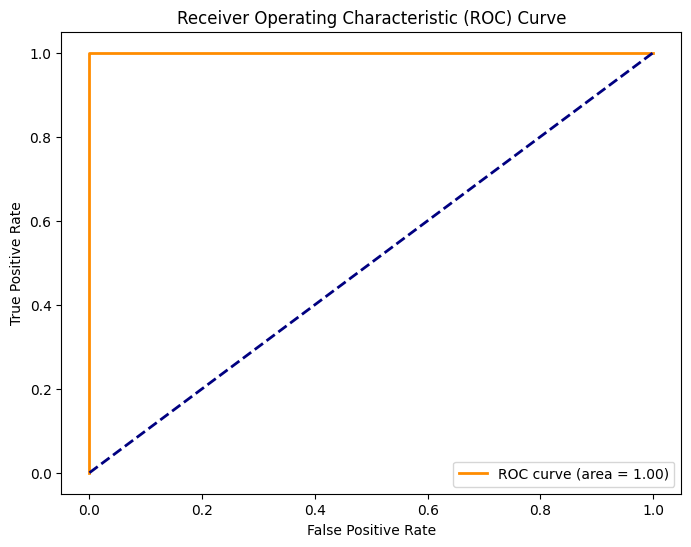

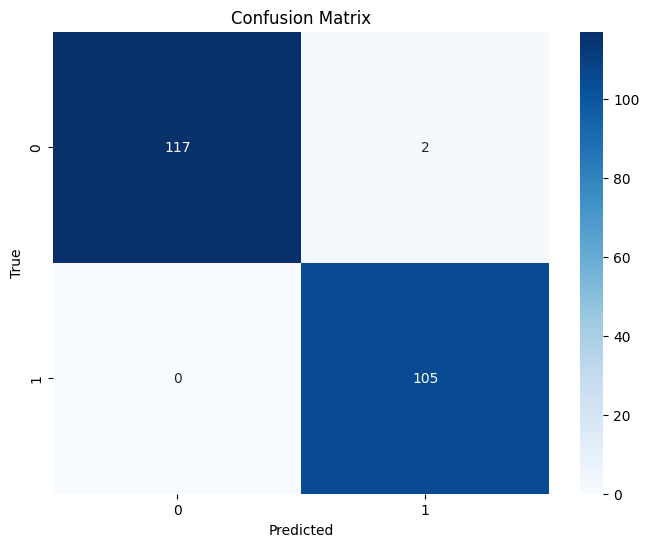

In [7]:
# Predict probabilities for ROC curve
y_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Load the model and vectorizer
loaded_classifier = joblib.load(model_filename)
loaded_vectorizer = joblib.load(vectorizer_filename)

# User input
user_input = input("Input: ")

# Use the loaded vectorizer to process user input
user_input_features = loaded_vectorizer.transform([user_input])

# Use the loaded classifier for prediction
prediction = loaded_classifier.predict(user_input_features)

# Print the prediction result
print(f"predict lable: {prediction[0]}")

模型预测标签: 0
